## Importing Libraries

In [1]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.utils import plot_model
from keras.models import Sequential
from sklearn.compose import ColumnTransformer
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

## Importing Dataset

In [2]:
leaf = pd.read_csv('dataset/leaf.csv')

In [3]:
leaf.head()

,1,1.1,0.72694,1.4742,0.32396,0.98535,1.2,0.83592,0.0046566,0.0039465,0.04779,0.12795,0.016108,0.0052323,0.00027477,1.1756
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


## Data Preparation & Preprocessing

In [4]:
columns = ['Species-(Class)', 'Specimen-Number', 'Eccentricity', 'Aspect-Ratio', 'Elongation', 'Solidity', 'Stochastic-Convexity', 'Isoperimetric-Factor', 'Maximal-Indentation-Depth', 'Lobedness', 'Average-Intensity', 'Average-Contrast', 'Smoothness', 'Third-moment', 'Uniformity', 'Entropy']

In [5]:
leaf_data = pd.read_csv('dataset/leaf.csv', names=columns)

In [6]:
leaf_data.head()

,Species-(Class),Specimen-Number,Eccentricity,Aspect-Ratio,Elongation,Solidity,Stochastic-Convexity,Isoperimetric-Factor,Maximal-Indentation-Depth,Lobedness,Average-Intensity,Average-Contrast,Smoothness,Third-moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.83592,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214


In [7]:
leaf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Species-(Class)            340 non-null    int64  
 1   Specimen-Number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect-Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic-Convexity       340 non-null    float64
 7   Isoperimetric-Factor       340 non-null    float64
 8   Maximal-Indentation-Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average-Intensity          340 non-null    float64
 11  Average-Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third-moment               340 non-null    float64

Finding and filling the missing values

In [8]:
print(leaf_data.isnull().any(axis=1))

0      False
1      False
2      False
3      False
4      False
       ...  
335    False
336    False
337    False
338    False
339    False
Length: 340, dtype: bool


In [9]:
print(leaf_data.isnull().sum(axis=1))

0      0
1      0
2      0
3      0
4      0
      ..
335    0
336    0
337    0
338    0
339    0
Length: 340, dtype: int64


Seperating dataset into X (Independent variables) and y (Dependent variable)

In [10]:
X = leaf_data.iloc[:, 2:].values
y = leaf_data.iloc[:, 0].values

In [11]:
print(X)

[[7.2694e-01 1.4742e+00 3.2396e-01 ... 5.2323e-03 2.7477e-04 1.1756e+00]
 [7.4173e-01 1.5257e+00 3.6116e-01 ... 2.7080e-03 7.4846e-05 6.9659e-01]
 [7.6722e-01 1.5725e+00 3.8998e-01 ... 9.2068e-04 3.7886e-05 4.4348e-01]
 ...
 [3.5344e-01 1.0329e+00 7.8147e-01 ... 1.6123e-02 4.5288e-04 1.6935e+00]
 [5.9988e-01 1.1427e+00 7.1532e-01 ... 6.1900e-03 2.6454e-04 1.1526e+00]
 [4.7195e-01 1.0901e+00 8.5409e-01 ... 1.3487e-02 3.2855e-04 1.5623e+00]]


In [12]:
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  5  5  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13
 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 15 15 15
 15 15 15 22 22 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23
 23 23 24 24 24 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25
 26 26 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 27 28
 28 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29 29 29 30
 30 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33 33 33 34 34 34 34
 34 34 34 34 34 34 34 35 35 35 35 35 35 35 35 35 35

Label Encoding & One Hot Encoding

In [13]:
label_encode = LabelEncoder()
y = label_encode.fit_transform(y)
y = np_utils.to_categorical(y)

In [14]:
print(y)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


Splitting the dataset into training set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(X_train)

[[8.7163e-01 2.0659e+00 5.5339e-01 ... 6.6921e-03 1.6133e-04 1.4016e+00]
 [3.9092e-01 1.0870e+00 6.8174e-01 ... 2.1177e-03 2.1044e-04 9.0082e-01]
 [7.7982e-01 1.6215e+00 3.9222e-01 ... 2.4664e-03 1.4676e-04 6.6975e-01]
 ...
 [3.8564e-01 1.0471e+00 2.3328e-01 ... 2.2000e-02 8.6835e-04 1.9757e+00]
 [4.9634e-01 1.1832e+00 2.2855e-01 ... 5.1731e-03 2.3865e-04 1.1489e+00]
 [2.3041e-01 1.1294e+00 2.5496e-01 ... 2.4180e-02 4.2353e-04 1.6648e+00]]


In [17]:
print(X_test)

[[9.9593e-01 1.0120e+01 9.2461e-01 8.0662e-01 9.0702e-01 1.5053e-01
  1.2257e-01 2.7342e+00 8.2902e-03 5.2333e-02 2.7313e-03 9.0459e-04
  1.5362e-05 2.7303e-01]
 [5.0692e-01 1.1270e+00 6.7203e-01 5.3024e-01 7.5263e-01 1.6792e-01
  1.3006e-01 3.0788e+00 1.5279e-02 5.7592e-02 3.3059e-03 7.2847e-04
  1.0983e-04 6.7289e-01]
 [2.4465e-01 1.0470e+00 6.0511e-01 5.6524e-01 7.9474e-01 2.1788e-01
  1.2522e-01 2.8540e+00 3.7595e-02 1.2700e-01 1.5874e-02 6.5870e-03
  1.0798e-04 8.3310e-01]
 [8.6545e-01 1.8803e+00 6.2039e-01 8.2443e-01 8.5439e-01 3.3077e-01
  4.7000e-02 4.0204e-01 3.9518e-02 1.1570e-01 1.3210e-02 4.2406e-03
  2.0084e-04 1.0136e+00]
 [8.2866e-01 1.9848e+00 5.0917e-01 9.4180e-01 9.9825e-01 5.5942e-01
  2.5524e-02 1.1857e-01 8.0103e-02 1.6692e-01 2.7107e-02 8.6548e-03
  4.2650e-04 1.8038e+00]
 [7.2719e-01 1.4779e+00 3.2980e-01 9.9388e-01 1.0000e+00 8.4230e-01
  2.9668e-03 1.6019e-03 2.6340e-02 8.1903e-02 6.6634e-03 1.7846e-03
  1.9390e-04 9.8050e-01]
 [9.6652e-01 3.8162e+00 7.4273e-01

In [18]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [19]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Feature scaling

In [20]:
sc = StandardScaler()

In [21]:
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.transform(X_test[:, :])

In [22]:
print(X_train)

[[ 0.76163594 -0.09999249  0.28756748 ...  0.12964517 -0.54447525
   0.34892358]
 [-1.54720948 -0.48953753  0.96697955 ... -0.75242946 -0.43518234
  -0.48890675]
 [ 0.32067341 -0.27683774 -0.56557506 ... -0.68519017 -0.57690037
  -0.87549857]
 ...
 [-1.57256927 -0.5054154  -1.40691323 ...  3.08144437  1.02897767
   1.30942198]
 [-1.04087825 -0.45125555 -1.43195117 ... -0.1632613  -0.37240178
  -0.07385633]
 [-2.31813743 -0.47266481 -1.29215162 ...  3.50181047  0.0390434
   0.78927052]]


In [23]:
print(X_test)

[[ 1.35864762e+00  3.10506906e+00  2.25259553e+00 -9.70838256e-01
  -3.76868278e-01 -1.89570817e+00  2.37951287e+00  2.26641625e+00
  -1.22313269e+00 -1.42133641e+00 -1.12200236e+00 -9.86351627e-01
  -8.69322882e-01 -1.53923124e+00]
 [-9.90062617e-01 -4.73619866e-01  9.15580323e-01 -3.55530582e+00
  -1.77293671e+00 -1.81221115e+00  2.58400054e+00  2.61172239e+00
  -1.03112097e+00 -1.32002515e+00 -1.07996110e+00 -1.02031258e+00
  -6.59087033e-01 -8.70245192e-01]
 [-2.24974285e+00 -5.05455195e-01  5.61343812e-01 -3.22801598e+00
  -1.39215789e+00 -1.57233126e+00  2.45186165e+00  2.38646174e+00
  -4.18006607e-01  1.70753024e-02 -1.60401773e-01  1.09378897e-01
  -6.63204155e-01 -6.02205740e-01]
 [ 7.31953456e-01 -1.73850449e-01  6.42227463e-01 -8.04294486e-01
  -8.52773983e-01 -1.03029681e+00  3.16344225e-01 -7.05226962e-02
  -3.65173710e-01 -2.00611926e-01 -3.55316362e-01 -3.43073865e-01
  -4.56546865e-01 -3.00220090e-01]
 [ 5.55251447e-01 -1.32265551e-01  5.34918880e-02  2.93248598e-01
  

## Building the Artificial Neural Network (ANN)

In [24]:
leafClassificationModel = Sequential()

In [25]:
# Input layer
leafClassificationModel.add(Dense(units=16, 
                                  activation='relu',
                                  input_dim=14) # Number of independent variables as input_dim.
                            )
leafClassificationModel.add(Dropout(0.15))

# Hidden layers
leafClassificationModel.add(Dense(units=32, 
                                  activation='relu')
                            )                            
leafClassificationModel.add(Dropout(0.1))

leafClassificationModel.add(Dense(units=64, 
                                  activation='relu')
                            )
leafClassificationModel.add(Dropout(0.25))

# Output layer
leafClassificationModel.add(Dense(units=30, # Number of classes to get predictions as output.
                                  activation='softmax') # Softmax activation function used to catergorical predictions.
                            )

In [26]:
leafClassificationModel.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

In [27]:
leafClassificationModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                240       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 30)                1

In [28]:
history = leafClassificationModel.fit(X_train,
                                      y_train,
                                      batch_size=16,
                                      validation_data=(X_test, y_test),
                                      epochs=500)

Epoch 1/500
17/17 [==============================] - 2s 42ms/step - loss: 3.4043 - accuracy: 0.0441 - val_loss: 3.3838 - val_accuracy: 0.0588
Epoch 2/500
17/17 [==============================] - 0s 8ms/step - loss: 3.3220 - accuracy: 0.1029 - val_loss: 3.2793 - val_accuracy: 0.1029
Epoch 3/500
17/17 [==============================] - 0s 7ms/step - loss: 3.2644 - accuracy: 0.1029 - val_loss: 3.1887 - val_accuracy: 0.1324
Epoch 4/500
17/17 [==============================] - 0s 7ms/step - loss: 3.1789 - accuracy: 0.1250 - val_loss: 3.0879 - val_accuracy: 0.1765
Epoch 5/500
17/17 [==============================] - 0s 7ms/step - loss: 3.0760 - accuracy: 0.1765 - val_loss: 2.9611 - val_accuracy: 0.2941
Epoch 6/500
17/17 [==============================] - 0s 9ms/step - loss: 2.9527 - accuracy: 0.1875 - val_loss: 2.8194 - val_accuracy: 0.2794
Epoch 7/500
17/17 [==============================] - 0s 7ms/step - loss: 2.8663 - accuracy: 0.1691 - val_loss: 2.6633 - val_accuracy: 0.3235
Epoch 8/500


## Model Training and Validation Accuracy (Mean)

In [29]:
train_accuracy = np.mean(history.history['accuracy'])
print("\n%s: %.2f%%" % ('Training Accuracy', train_accuracy*100))

val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('Validation Accuracy', val_accuracy*100))


Training Accuracy: 70.17%

Validation Accuracy: 71.78%


## Accuracy Plot of Training and Validation

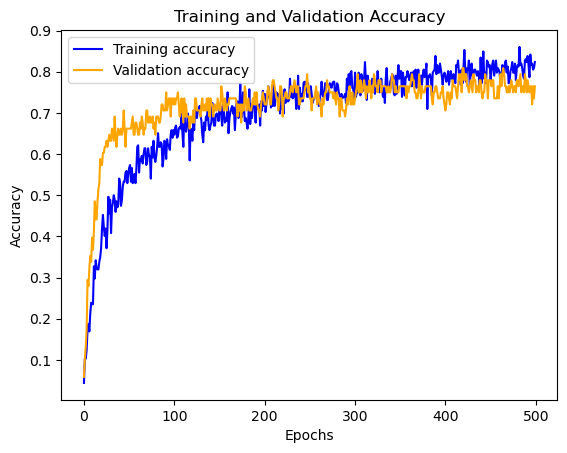

In [30]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "blue", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "orange", label='Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss Plot of Training and Validation

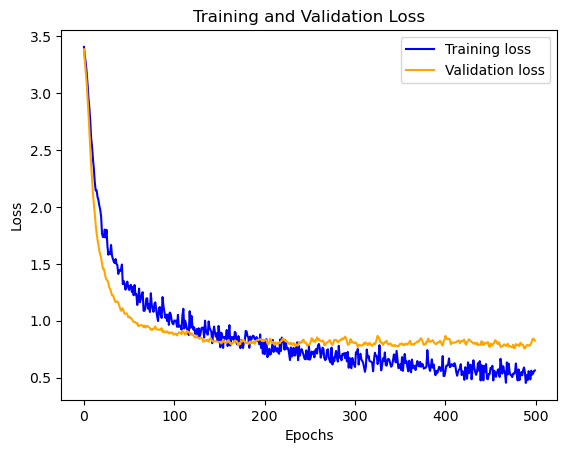

In [31]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "blue", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']], "orange", label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

## Predicting the Test Set Results

In [32]:
# y_pred = leafClassificationModel.predict(X_test)
# y_pred.shape

In [33]:
# cmatrix = confusion_matrix(y_test, y_pred)
# print(cmatrix)

## Confusion Matrix

In [34]:
# fig, ax = plt.subplots(figsize=(8, 5))
# cmp = ConfusionMatrixDisplay(
#     confusion_matrix(y_test, y_pred),
#     display_labels=columns,
# )

# cmp.plot(ax=ax)
# plt.show();

## Classification Report

In [35]:
# print(classification_report(y_test, y_pred))

## Saving the model

In [36]:
leafClassificationModel.save('model/leafClassifier.h5')